# Selecting the best model for predicting the selling price

### Importing the standard libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.api import keras

### Importing the dataset

In [62]:
dataset = pd.read_csv('../assets/car-details-for-ml.csv')

dataset.head()

,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,selling_price
0,2014,145500,0,0,1,0,5.0,23.40,1248,74.00,...,0,0,0,0,0,0,0,0,0,450000
1,2014,120000,0,0,1,2,5.0,21.14,1498,103.52,...,0,0,0,0,1,0,0,0,0,370000
2,2006,140000,1,0,1,3,5.0,17.70,1497,78.00,...,0,0,0,0,0,0,0,0,0,158000
3,2010,127000,0,0,1,0,5.0,23.00,1396,90.00,...,0,0,0,0,0,0,0,0,0,225000
4,2007,120000,1,0,1,0,5.0,16.10,1298,88.20,...,0,0,0,0,0,0,0,0,0,130000


In [63]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting data to train and test sets

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=73)

### Feature scaling the data

Some of the models might require the features to be scaled. Feature scaling is a common practice in machine learning and helps to normalize the features because some models are sensitive to the scale.

In [65]:
from sklearn.preprocessing import StandardScaler

X_std_scaler = StandardScaler()

X_train_scaled = X_std_scaler.fit_transform(X_train)
X_test_scaled = X_std_scaler.transform(X_test)

# Sample the scaled values
print(X_train_scaled[:1, :12])
print(X_test_scaled[:1, :12])

[[-0.25 -0.23  1.09 -0.37  2.86 -0.69 -0.45  0.59 -0.9  -0.7  -0.98  0.  ]]
[[ 1.06 -1.02 -0.91  2.69 -2.36 -0.69 -0.45 -0.38  1.05  3.04  2.62  0.  ]]


### Defining methods for helping to evaluate the models

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R2 (R-squared) score = Statistical measure of how close the predicted data are to the actual data.
# Mean Absolute Error (MAE) = The mean value of all errors, positive and negative (absolute value)
# Root Mean Squared Error (RMSE) = The errors are squared and then the mean value is found. The root of the calculated mean value is taken.

labels = ['Model', 'R2', 'MAE', 'RMSE']
results = []

def model_evaluation(model: str, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    results.append([model, r2, mae, rmse])
    return [model, r2, mae, rmse]

In [67]:
# Plots n predictions and actual values against each other
import random

def plot_results_graph(model: str, y_test, y_pred, start: int = 0, end: int = 200):
    color = (random.random(), random.random(), 0)

    plt.figure(figsize=(20, 8))
    plt.plot(y_test[start:end], color="b")
    plt.plot(y_pred[start:end], '--', color=color,)
    plt.title(model)
    plt.ylabel('Price')
    plt.legend(['Actual value','Predicted value'])
    plt.show()

## Linear Regression

We will start out by testing the Linear Regression model, as a lot of the features seemed to have a linear relation with one another.

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Predicting the selling price from the test set**

In [69]:
y_pred = lin_reg.predict(X_test)

np.set_printoptions(precision=2)
actual_vs_pred = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(actual_vs_pred[:8])

['Actual', 'Predictions']
[[3400000.   3167029.57]
 [ 950000.    897326.57]
 [ 934000.    662089.09]
 [ 450000.    377910.69]
 [ 350000.    506326.19]
 [ 140000.    160681.77]
 [1125000.    952061.4 ]
 [ 316000.    409682.88]]


Some of the results are not very good and some are pretty close. I don't think this model is the best, so let's evaluate it and see if we can find a better fit.

### Evaluating the model

In [70]:
lin_reg_result = model_evaluation('Linear Regression', y_test, y_pred)

for i in range(len(lin_reg_result)):
    print(labels[i], ':', lin_reg_result[i])

Model : Linear Regression
R2 : 0.8488188683573407
MAE : 138948.16612886183
RMSE : 230871.72159128037


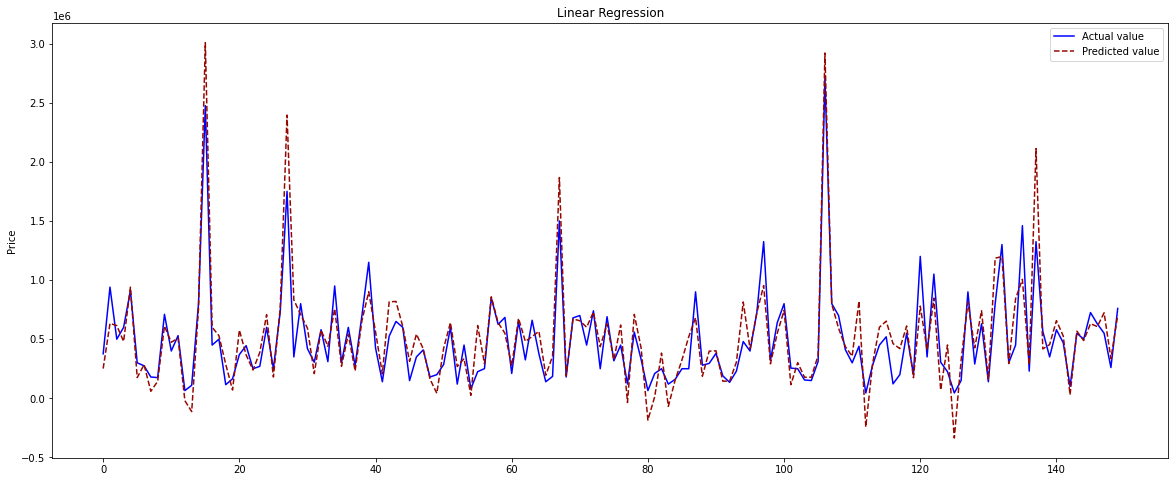

In [71]:
plot_results_graph('Linear Regression', y_test, y_pred, 1250, 1400)

Looking at the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) we can see that the model is not very good. The predictions are off by a high value, which is not good. The R2 score is also not the greatest, but it is still a decent model. By looking at the lines of the graph we can see the model is doing alright at predicting the lower end of the price range, but can be caught off by the higher end.

## Logistic Regression

Since the linear regression model didn't perform as well as I wanted, let's try the Logistic Regression model, to see if it fits the features better.

In [72]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=73, max_iter=1000, solver="lbfgs")
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=73)

In [73]:
y_pred = log_reg.predict(X_test_scaled)

np.set_printoptions(precision=2)
actual_vs_pred = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(actual_vs_pred[:8])

['Actual', 'Predictions']
[[3400000 2475000]
 [ 950000  850000]
 [ 934000  700000]
 [ 450000  450000]
 [ 350000  350000]
 [ 140000  200000]
 [1125000  600000]
 [ 316000  310000]]


In [74]:
log_reg_result = model_evaluation('Logistic Regression', y_test, y_pred)

for i in range(len(log_reg_result)):
    print(labels[i], ':', log_reg_result[i])

Model : Logistic Regression
R2 : 0.8906364601020804
MAE : 111167.05867014342
RMSE : 196362.35186446295


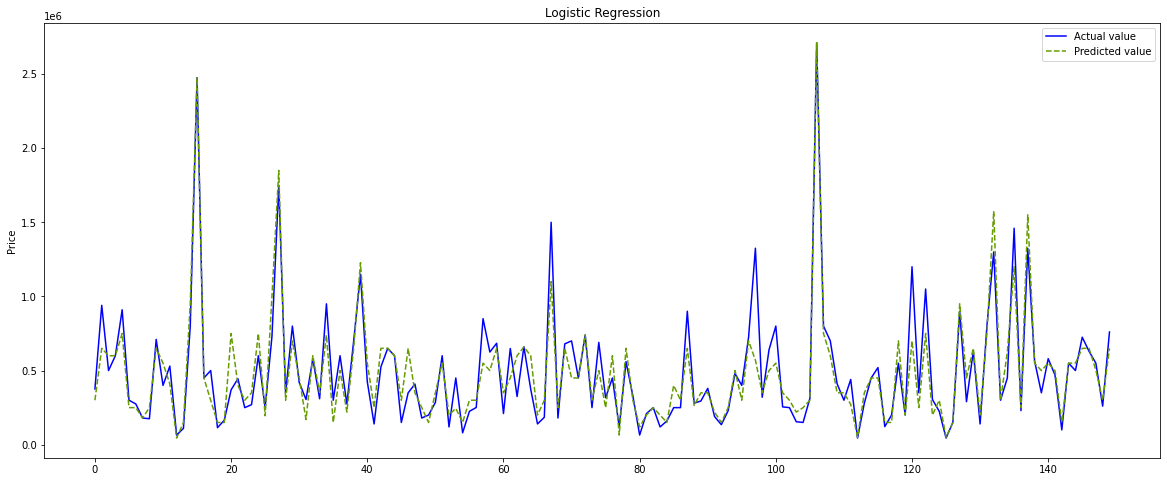

In [75]:
plot_results_graph('Logistic Regression', y_test, y_pred, 1250, 1400)

Definitely yielded beter results than the Linear Regression model, but I'm certain it's possible to get better results with a more complex model.

## Support Vector Regression

Also not happy with the result of the Logistic Regression model, I will try the Support Vector Regression model and see if we can improve the results.

The SVR model requires scaled features, so we will used the scaled features for this model.

In [76]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="rbf", C=1000000)
svm_reg.fit(X_train_scaled, y_train)

SVR(C=1000000)

The SVR model seems to perform best with a kernel of rbf and a C of a higher value.

In [77]:
y_pred = svm_reg.predict(X_test_scaled)

np.set_printoptions(precision=2)
actual_vs_pred = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(actual_vs_pred[:8])

['Actual', 'Predictions']
[[3400000.   2858961.05]
 [ 950000.   1101594.15]
 [ 934000.    686568.19]
 [ 450000.    415645.96]
 [ 350000.    431095.14]
 [ 140000.    190028.95]
 [1125000.   1124999.49]
 [ 316000.    284599.48]]


In [78]:
svm_reg_result = model_evaluation('Support Vector Regression', y_test, y_pred)

for i in range(len(svm_reg_result)):
    print(labels[i], ':', svm_reg_result[i])

Model : Support Vector Regression
R2 : 0.9304520998588243
MAE : 75347.76492770997
RMSE : 156589.97560850796


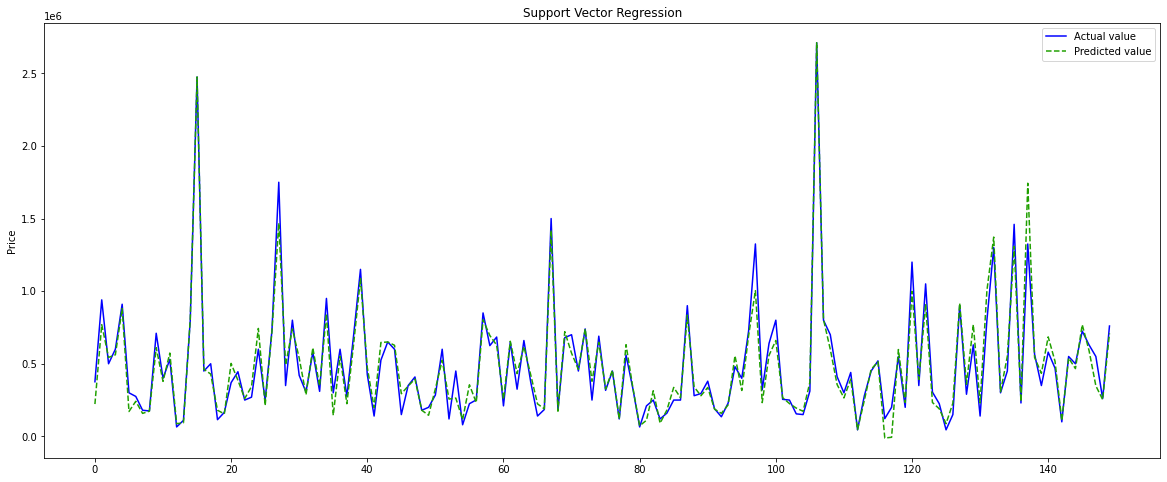

In [79]:
plot_results_graph('Support Vector Regression', y_test, y_pred, 1250, 1400)

The results yielded from the SVR model are a lot better than the Linear Regression model. The R2 score is still not great, but the MAE and RMSE have improved a bit.

## Decision Tree Regression

Again not happy with the results of the SVR model, I will try the Decision Tree model and see if we can improve the results.

In [80]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=73)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=73)

In [81]:
y_pred = tree_reg.predict(X_test)

np.set_printoptions(precision=2)
actual_vs_pred = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(actual_vs_pred[:8])

['Actual', 'Predictions']
[[3400000. 3400000.]
 [ 950000. 1200000.]
 [ 934000.  600000.]
 [ 450000.  450000.]
 [ 350000.  380000.]
 [ 140000.  110000.]
 [1125000. 1125000.]
 [ 316000.  268000.]]


In [82]:
tree_reg_result = model_evaluation('Decision Tree Regression', y_test, y_pred)

for i in range(len(tree_reg_result)):
    print(labels[i], ':', tree_reg_result[i])

Model : Decision Tree Regression
R2 : 0.9301379178687305
MAE : 75706.39759110946
RMSE : 156943.2739296638


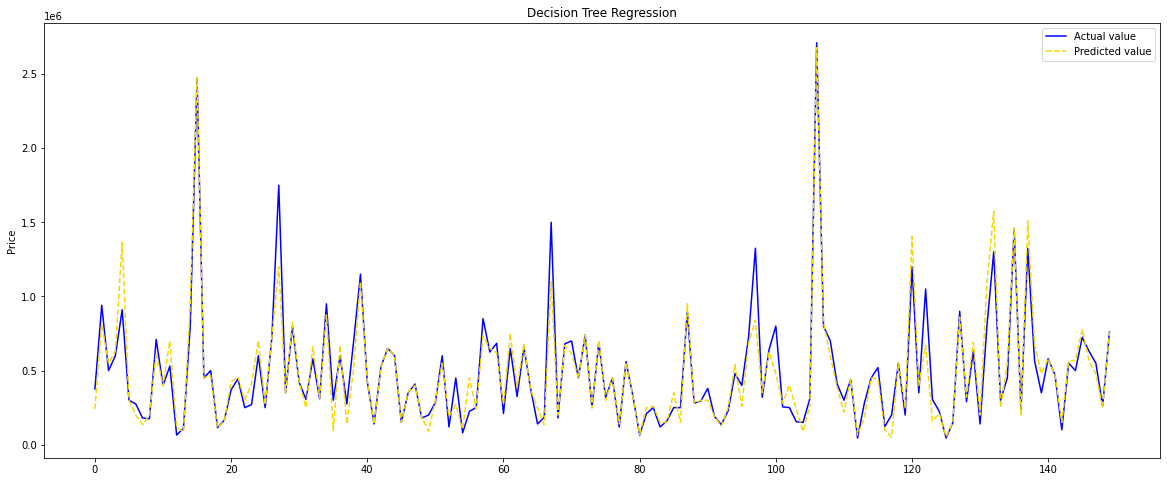

In [83]:
plot_results_graph('Decision Tree Regression', y_test, y_pred, 1250, 1400)

The decision tree regression model has yielded around the same results as the SVR model. But I'm sure we can get an even better model. The graph still shows a decent fit, but there are still some outliers.

## Random Forest Regression

A single decision tree regression model had some good scores, so let's see if we can improve the results with a random forest model.

In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=73)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=73)

In [85]:
y_pred = forest_reg.predict(X_test)

np.set_printoptions(precision=2)
actual_vs_pred = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(actual_vs_pred[:8])

['Actual', 'Predictions']
[[3400000.   3523600.  ]
 [ 950000.   1078759.99]
 [ 934000.    776176.18]
 [ 450000.    438850.  ]
 [ 350000.    428389.98]
 [ 140000.    195979.99]
 [1125000.   1161620.  ]
 [ 316000.    275261.67]]


In [86]:
forest_reg_result = model_evaluation('Random Forest Regression', y_test, y_pred)

for i in range(len(forest_reg_result)):
    print(labels[i], ':', forest_reg_result[i])

Model : Random Forest Regression
R2 : 0.968150075757641
MAE : 62365.82973007254
RMSE : 105968.34395664117


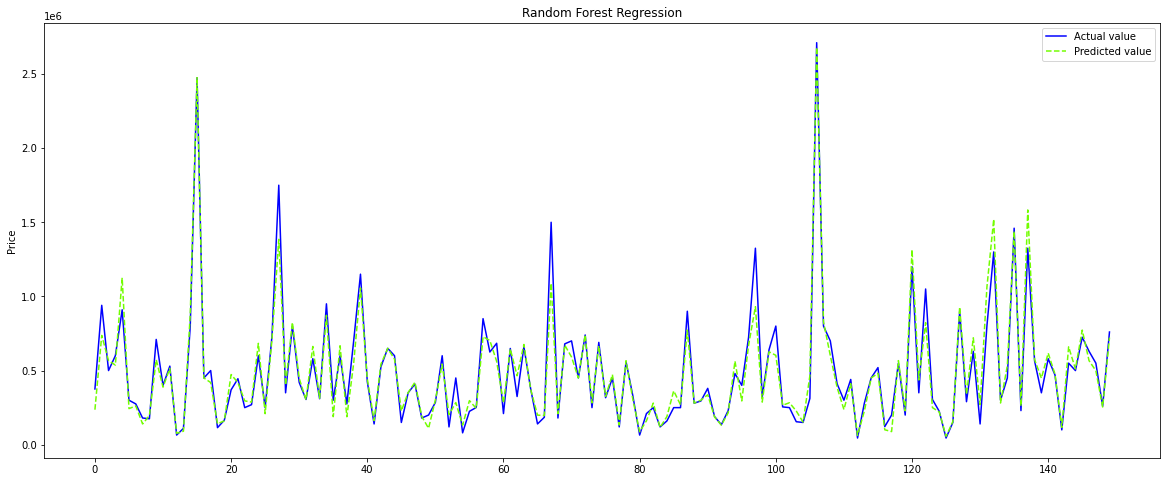

In [87]:
plot_results_graph('Random Forest Regression', y_test, y_pred, 1250, 1400)

Once again we've found a model that performs better than the previous model, the R2, MAE and RMSE scores have all improved a bit again and even the graph looks great with only a few outliers. Let's see if we can yield even better results with other models, such as a neural network.

## Deep Neural Network Regression

In [88]:
tf.random.set_seed(73)
np.random.seed(73)
keras.backend.clear_session()

neural_net = keras.models.Sequential([
    keras.layers.Dense(300, activation=tf.nn.relu, input_shape=[len(X_train_scaled[0])]),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation="linear", kernel_initializer="normal")
])

neural_net.compile(loss="mape", optimizer=keras.optimizers.RMSprop(0.0099), metrics=['mae'])

history = neural_net.fit(X_train_scaled, y_train, epochs=150, batch_size=24, verbose=0)

neural_net.evaluate(X_test_scaled, y_test)

48/48 [==============================] - 0s 532us/step - loss: 15.3189 - mae: 72890.4297


[15.318942070007324, 72890.4296875]

In [89]:
y_pred = neural_net.predict(X_test_scaled)

np.set_printoptions(precision=2)
actual_vs_pred = np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1)

print(["Actual", "Predictions"])
print(actual_vs_pred[:8])

['Actual', 'Predictions']
[[3400000.   3215521.5 ]
 [ 950000.   1152839.62]
 [ 934000.    726750.06]
 [ 450000.    434087.88]
 [ 350000.    414887.22]
 [ 140000.    165326.47]
 [1125000.   1222604.38]
 [ 316000.    302227.  ]]


In [90]:
neural_net_result = model_evaluation('Deep Neural Network Regression', y_test, y_pred)

for i in range(len(neural_net_result)):
    print(labels[i], ':', neural_net_result[i])

Model : Deep Neural Network Regression
R2 : 0.9502826925094837
MAE : 72890.41288731463
RMSE : 132396.26878651197


In [91]:
neural_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               12600     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 49,229
Trainable params: 49,229
Non-trainable params: 0
_________________________________________________________________


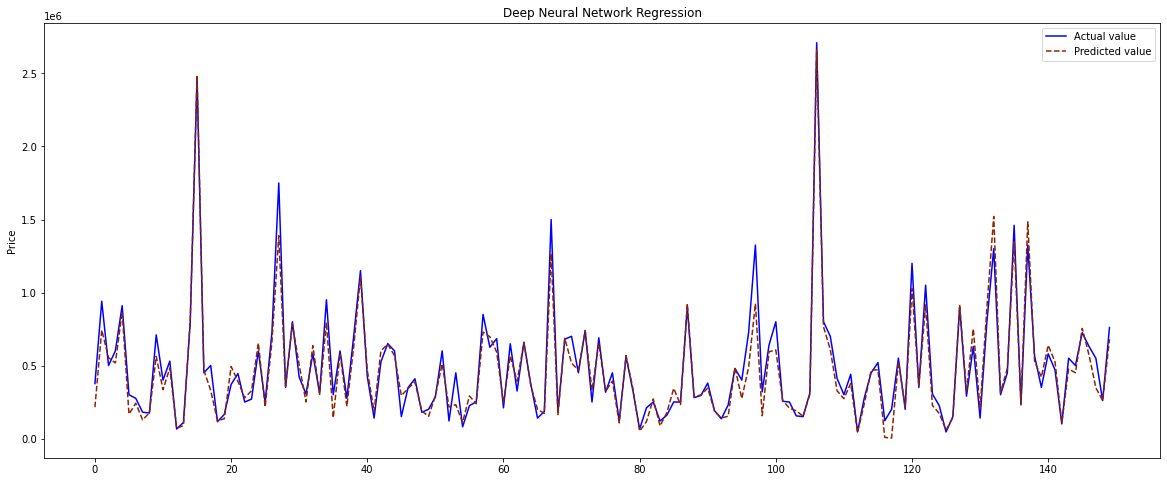

In [92]:
plot_results_graph('Deep Neural Network Regression', y_test, y_pred, 1250, 1400)

Again getting pretty close with the Artificial Neural Network, but it still loses out to the Random Forest model in pretty much every aspect. The graph is looking really good, but the R2, MAE and RMSE still indicates the model is not the greatest.

## Model selection